## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## DATA UNDERSTANDING & CLEANING

***Import the necessary libraries***

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import seaborn as sns
#Import Numpy and the Pandas Package
import numpy as np
import pandas as pd
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import StatsModel
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

***Read the kc_house_data.csv***

In [51]:
data = pd.read_csv(r"C:\Users\willi\OneDrive\Documents\GitHub\dsc-phase-2-project-v2-3\data\kc_house_data.csv")
# Display the head of the data
print(data.head())

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.2

In [52]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [54]:
data.shape

(21597, 21)

 - The data is loaded from a CSV file named "kc_house_data.csv" into a Pandas DataFrame.
 - It has 20 columns with 21597 rows
 - The data contains missing values in the columns : waterfront, view, yr_renovated and zipcode
 - Waterfront, view, and year-renovated are the only columns with missing values
 -The following variables had a strong positive correlation with price: * sqft_living, sqft_above, sqft_living15, and bathrooms
 
 

***Clean the kc_house_data.csv dataset***

In [55]:
# 1. Convert 'date' to a datetime object
data['date'] = pd.to_datetime(data['date'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [56]:
# 2. Check for duplicates
duplicates_with_rows = data[data.duplicated()]
duplicates_with_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [57]:
# 3. Handle missing values in sqft_living to fill missing values with the mean:
data['sqft_living'] = data['sqft_living'].fillna(data['sqft_living'].mean())

In [58]:
data.dropna(inplace = True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15762 non-null  object        
 14  yr_built       15762 non-null  int64         
 15  yr_renovated   1576

 ***How we handled missing values in each column***
 - We found no duplicate rows
 - Then missing values in the column sqft_living were filled with the average value
 - Since the other column didn't have enough data to fill the missing values we dropped those rows

***Read the column_names.md***

In [60]:
with open(r"C:\Users\willi\OneDrive\Documents\GitHub\dsc-phase-2-project-v2-3\data\column_names.md", 'r') as file:
    md_lines = file.readlines()

df = pd.DataFrame({'Text': md_lines})

df.head()

,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n


In [61]:
df.shape

(26, 1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


 - The dataset has only one column and 26 rows
 - Each row is aligned to the columns in kc_house_data.csv entailing the column's descriptions 

***Clean the columns_name.md dataset***

In [64]:
df.head()

,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n


In [65]:
df[['Column name', 'Descriptions']] = df['Text'].str.split('-', n=1, expand=True)

In [66]:
# Drop the original 'Text' column
df.drop(columns=['Text'], inplace=True)

In [67]:
# Remove rows where 'Descriptions' column contains 'None'
df = df[df['Descriptions'].notna()]

In [68]:
# Remove asterisks from 'Column name' column
df['Column name'] = df['Column name'].str.replace('*', '').str.strip()

# Remove leading and trailing whitespaces from 'Descriptions' column
df['Descriptions'] = df['Descriptions'].str.strip()

In [69]:
df_duplicates = df[df.duplicated()]
df_duplicates

,Column name,Descriptions


In [70]:
df

,Column name,Descriptions
1,`id`,Unique identifier for a house
2,`date`,Date house was sold
3,`price`,Sale price (prediction target)
4,`bedrooms`,Number of bedrooms
5,`bathrooms`,Number of bathrooms
6,`sqft_living`,Square footage of living space in the home
7,`sqft_lot`,Square footage of the lot
8,`floors`,Number of floors (levels) in house
9,`waterfront`,Whether the house is on a waterfront
11,`view`,Quality of view from house


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 25
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column name   21 non-null     object
 1   Descriptions  21 non-null     object
dtypes: object(2)
memory usage: 504.0+ bytes


In [72]:
df.shape

(21, 2)

 - The dataset had one column that had two columns inside it, so we split each row using dash as the separator (-)
 - Thus we ended up having two columns : Column Names and Descriptions

# Exploratory Data Analysis

## check for outliers

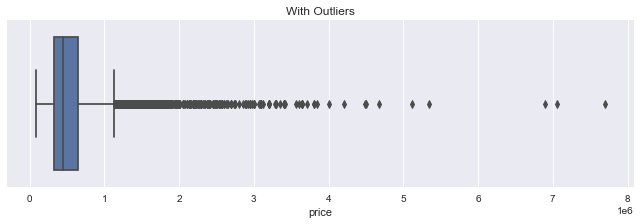

In [73]:
# An outlier is an obervation that lies in an abnormal distance from other values
# Outliers affect the data quality and hence the accuracy of the final model
# Checking for ouutliers is, therefore, vital before proceeding to the next step in the project
# In this case, we check for the outliers using a box plot

sns.catplot(x='price', data=data, kind='box', height=3, aspect=3).set(title="With Outliers")

## Deal with Outliers

An outlier is an obervation that lies in an abnormal distance from other values.
Outliers affect the data quality and hence the accuracy of the final model.
You can deal with the outliers by removing them to improve the quality of the model.

In [74]:
#I chose to use Interquartile Range (IRQ) to remove the outliers

Q75 = np.percentile(data['price'],75)
Q25 = np.percentile(data['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

df1 = data[(data['price']<upper)]
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


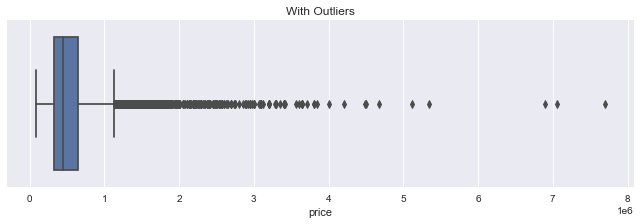

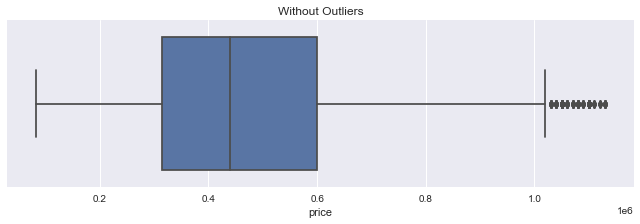

In [75]:
# Let me compare the box plots of with and without outliers
# I will plot a box plot without the outliers
# And from what we can see now, the box plot looks great

sns.catplot(x='price', data=data, kind='box', height=3, aspect=3).set(title="With Outliers");
sns.catplot(x='price', data=df1, kind='box', height=3, aspect=3).set(title='Without Outliers');

# Checking for Skeweness

Removing outliers is a good way to normalizse the skewness of our graph
We assume that by removing the outliers then the graph will take a shape the look like a normal distribution

4.226727017501067


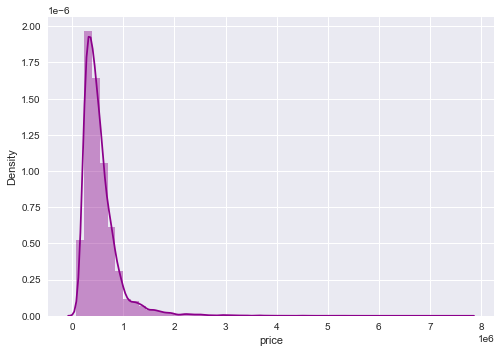

In [76]:
# Let us check the skewness of the graph before removing the outliers

sns.distplot(data.price, color='darkmagenta')
print(data['price'].skew())

0.753349812833949


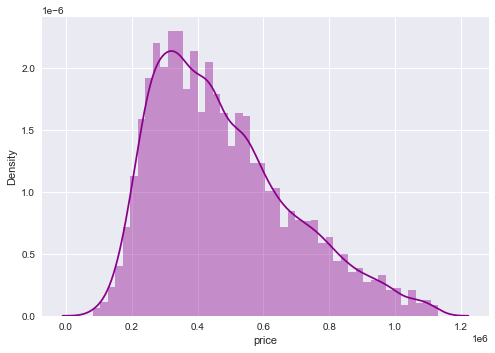

In [77]:
# Now let use see the skewness after dealing with the outliers
# Notice the differences?

sns.distplot(df1.price, color='darkmagenta') 

print(df1['price'].skew())

## Handling Non-Numeric/Categorical Variables
Non-numeric or categorical data is a great way to understand our data but not the best when it comes to linear regression
Categorical variables will cause problems to the regression model if not transformed further
Some of the categorical data in our dataset include condition, view, waterfront, and grade

# Use One-Hot Coding with Pandas
One-hot encoding is a great way to transform categorical variable in a model
I will use one-hot coding to create multiple dummy varriables for each category of condition and grade variable
I will use the pandas' get_dummies method in this approach

In [78]:
# Check the value counts for the condition variable

df1['condition'].value_counts()

Average      9681
Good         3954
Very Good    1149
Fair          129
Poor           18
Name: condition, dtype: int64

In [79]:
# We will also do this with the grade column because it will also be useful for our model

df1['grade'].value_counts()

7 Average        6531
8 Good           4355
9 Better         1699
6 Low Average    1481
10 Very Good      569
5 Fair            167
11 Excellent      109
4 Low              16
12 Luxury           3
3 Poor              1
Name: grade, dtype: int64

In [80]:
# Making a copy of the categorical variables to prepare them for one-hot encoding
copies_df = df1[["condition", "grade"]].copy()
copies_df.sample(10, random_state=1)


,condition,grade
15168,Good,7 Average
1038,Average,8 Good
17982,Good,7 Average
20099,Average,9 Better
18153,Average,8 Good
14208,Average,6 Low Average
4440,Average,8 Good
14195,Average,9 Better
7444,Average,6 Low Average
18094,Average,7 Average


In [81]:
# Pandas' get_dummies offers a quick way to perform one-hot encoding 
# and return the dummy varriable to our dataframe 
# However, as you can notice, the original variable (condition) has been dropped and dummy variables added

pd.get_dummies(df1, columns=["condition", "grade"]).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0


# Avoiding the Dummy Variable Trap
Perfect multicollinearity is a problem when dealing with dummy varriables

Perfect multicollinearity is when you are able to predict one variable from all the other

One-hot ecoding dummy variables suffer from this problem

In [82]:
# Eliminating perfect multicollinearity
df_dummies = pd.get_dummies(df1, columns=["condition", "grade"], drop_first = True)
df_dummies.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1,0,0,0,0,0,0,1,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0


In [83]:
df_dummies.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

This is the final dataset that will be used for the modelling, so lets clean it up a bit more by dropping columns that may not be needed for the modelling.

In [84]:
df_dummies.drop(columns=['lat'], inplace=True)

## Data Visualization

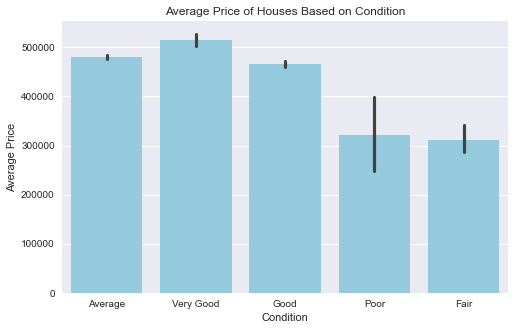

In [85]:
# Bar plot: Condition vs Average Price
plt.figure(figsize=(8, 5))
sns.barplot(x='condition', y='price', color = 'skyblue', data=df1)
plt.title('Average Price of Houses Based on Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show()

**Bar Plot (Condition vs Average Price):**

 - This plot illustrates the average price of houses based on their condition.
 - The x-axis represents the condition of the house, and the y-axis represents the average price.
 - It helps identify whether the condition of the house affects its price significantly. 
 - In this case houses in very good condition are sold with the highest prices.

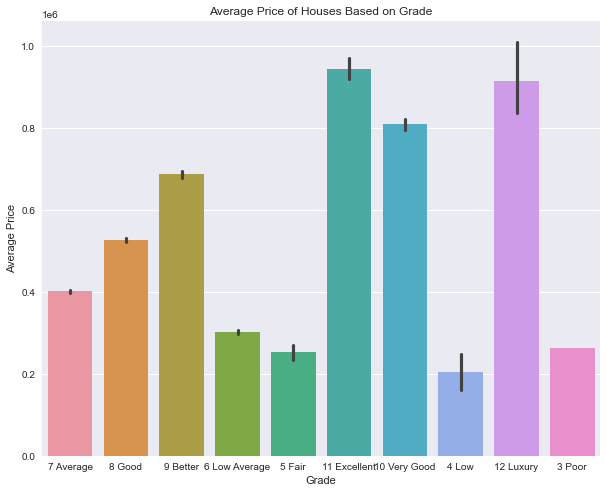

In [86]:
# Bar plot: Grade vs Average Price
plt.figure(figsize=(10, 8))
sns.barplot(x='grade', y='price', data=df1)
plt.title('Average Price of Houses Based on Grade')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.show()

**Bar Plot (Grade vs Average Price):**

 - This plot displays the average price of houses based on their grade.
 - The x-axis represents the grade of the house, and the y-axis represents the average price.
 - It helps understand how the quality of construction and design, as indicated by the grade, influences the price of houses. In ths case Grade 12 luxury houses are listed with the highest price and Grade 4 Low are listed with the lowest prices

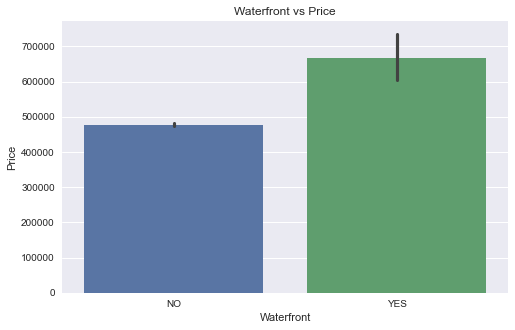

In [87]:
# Bar plot of waterfront vs price
plt.figure(figsize=(8, 5))
sns.barplot(x='waterfront', y='price', data=df1)
plt.title('Waterfront vs Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

**Bar Plot (Waterfront vs Price):**
 - This plot compares the average price of houses with and without waterfront views.
 - The x-axis represents the presence of a waterfront view (0 for No, 1 for Yes), and the y-axis represents the average price.
 - The bar corresponding to houses with waterfront views is higher, indicating that, on average, houses with waterfront views have higher prices compared to those without.

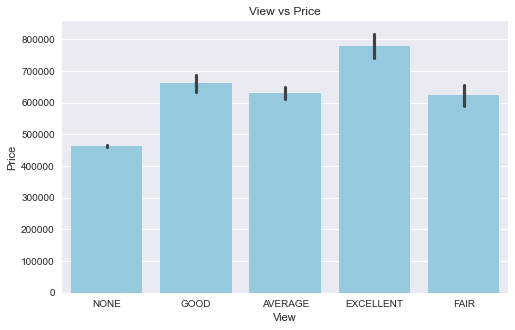

In [88]:
# Bar plot of view vs price
plt.figure(figsize=(8, 5))
sns.barplot(x='view', y='price', color = 'skyblue', data=df1)
plt.title('View vs Price')
plt.xlabel('View')
plt.ylabel('Price')
plt.show()

**Bar Plot (View vs Average Price):**
    
 - This plot shows the average price of houses based on the view they offer.
 - The x-axis represents the view quality, and the y-axis represents the average price.
 - It helps understand how the quality of the view impacts the price of the houses. Thus houses with excellent views have higher prices as compared to those without

# Modeling

#### Simple Linear Regression Model
Statistical modeling uses data along with statistics to provide a framework for understanding data relationships between variables

We start by a simple liear regression model that will provide a formula with which a house seller can use to predict the price of a house given sqft_living

This statistical model will explain the relationship between price which in this case is the dependent variable and sqft_living, the independent variable

Our model will build on the mathematical equation for a straight line:
                     **y= mx + c**

                     

## Identifying the Variables and Visualizing their Relationship
The first step for every statistical model is to identify the dependent and independent variables, then second step is to visualize their relationships

In our case, we have identfied price as the dependent varaibale and sqft_living as the independent of which we want to explore the relationship

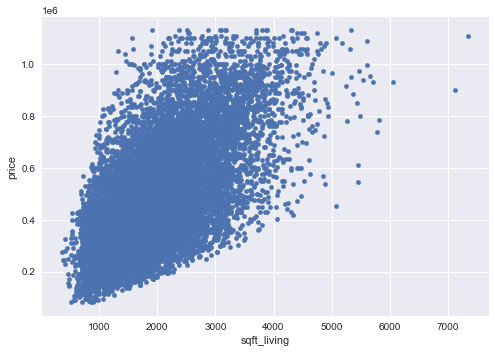

In [89]:
df1.plot(x='sqft_living', y='price', kind='scatter');

Based on the plot above we can see that there is a linear but not a perfectly linear relationship between price and sqft_living.

This means that we can proceed on with our model but be very keen on model loss as this can hugely impact the predicted price of the house given sqft_living.


## Building the Model

We used StatsModels to build the first model

StatsModels allows for estimation by ordinary least squares (OLS) which minimizes residuals

This means that our line of best fit will have the least model loss and hence the best suited to predict the price

In [90]:
# Next is to find the best values for our model parameters by "fitting" the model
# And then check the model parameters using the summary

y = df1["price"]
X = df1[["sqft_living"]]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summary = model.summary()

print(summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     9520.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:44:35   Log-Likelihood:            -2.0037e+05
No. Observations:               14931   AIC:                         4.007e+05
Df Residuals:                   14929   BIC:                         4.008e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.45e+05   3661.011     39.599      

# Findings

Our regression line for this model is:
    
    price = 144970.67+ 168.01 * sqft_living

Our model has a p-value of 0.0 this is less than the alpha = 0.05 meaning that it is statistically significant and that our data has no likelihood of occuring by a random chance.

In this case, R-squared is 0.389, indicating that approximately 38.9% of the variability in price can be explained by sqft_living.

The coefficient for sqft_living is 168.0138, indicating that, on average, each additional square foot of living space is associated with an increase in price of $168.01.

Confidence intervals - we can be 95% confident that the true coefficient for sqft_living falls within the interval [164.639, 171.389].

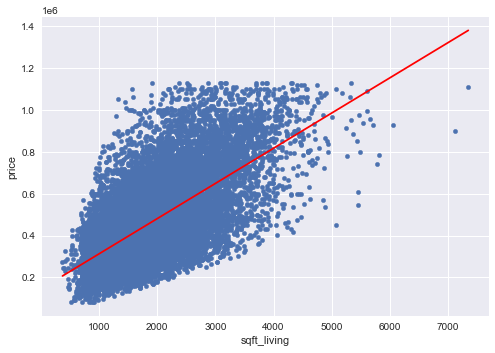

In [91]:
# Let us do some visualization of our regression 

fig, ax = plt.subplots();
df1.plot(x="sqft_living", y="price", kind="scatter", ax=ax)

# set up line data representing linear regression model
x = np.linspace(df1["sqft_living"].min(), df1["sqft_living"].max())
y = x * model.params["sqft_living"] + model.params["const"]

# plot model on the same axes as the data
ax.plot(x, y, color="red");

# Residual Plot
Plotting the residuals (the differences between observed and predicted values) against the predicted values helps assess the assumption of homoscedasticity (constant variance) and identify patterns or outliers in the residuals.

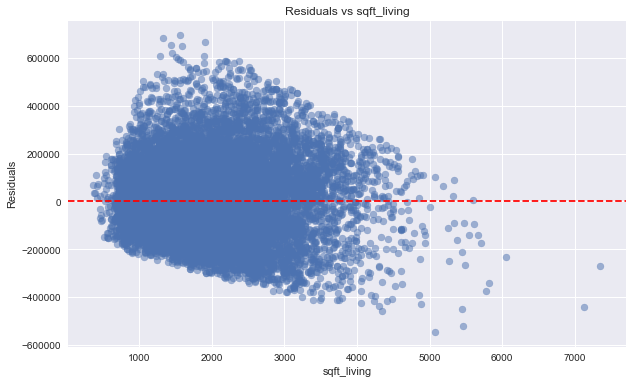

In [92]:
predicted_values = model.predict()
residuals = model.resid

# Plot residuals against sqft_living
plt.figure(figsize=(10, 6))
plt.scatter(df_dummies['sqft_living'], residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add red line at y=0
plt.title('Residuals vs sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## Multiple Linear Regression

As we saw from above we have a relatively low R squared value showing that our model is not very accurate. Multiple linear regression will now be used because the R-squared value tends to increase with the inclusion of additional independent variables in the model, as they account for more variance in the outcome. This indicates a better fit of the model to the data and suggests that the model is better able to explain the variability in the dependent variable.